In [44]:
### import basic libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("insurance.csv")                                              ### dataset loading

In [100]:
### dataset analyzing
for i in range(1,2,1):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head())
    print("DESCRIBE:")
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(1338, 7)
COLUMNS:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
HEAD:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       1  16884.92400
1   18    1  33.770         1       0       0   1725.55230
2   28    1  33.000         3       0       0   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520
DESCRIBE:
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000  

In [48]:
###based on df.head() & df.info():-
#1. (categoricalfeature(object))#Sex #Smoker #Region --------------------------------------------------- label encoding (it will become countplot)
#2. (numericalfeature)#children# ----------------------------------------------------------------------- countplot
#3. (numericalfeature)#age #bmi  #charges--------------------------------------------------------------- histplot

In [49]:
df.isnull().sum()                                                           ### to find null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

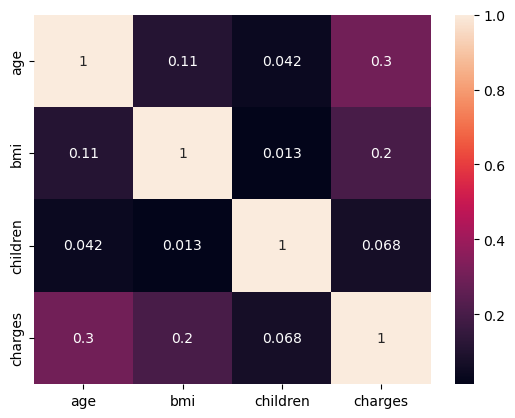

In [50]:
### dataset visualization
sns.heatmap(df.corr(),annot=True)

In [51]:
#1. (categoricalfeature(object))#Sex #Smoker #Region ------------------label encoding (countplot)      ###Data Pre-Processing (Encoding the  Data) (letter ------> 0's&1's)  (labelencoding) 
df.replace({'sex':{'male':1,'female':0}}, inplace=True)                                          # encoding sex column
df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)                                            # encoding 'smoker' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)   # encoding 'region' column      #df.head()

In [52]:
#2. (numericalfeature)#sex,smoker,region,children  -------------------- countplot
#3. (numericalfeature)#age #bmi --------------------------------------- histplot/distplot

<AxesSubplot:xlabel='sex', ylabel='count'>

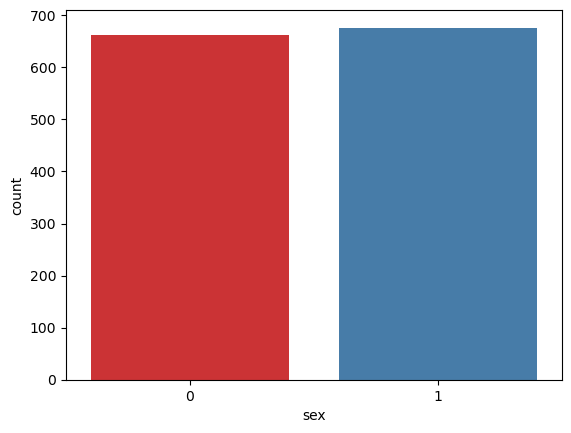

In [53]:
sns.countplot(x="sex", data=df, palette="Set1")        

<AxesSubplot:xlabel='smoker', ylabel='count'>

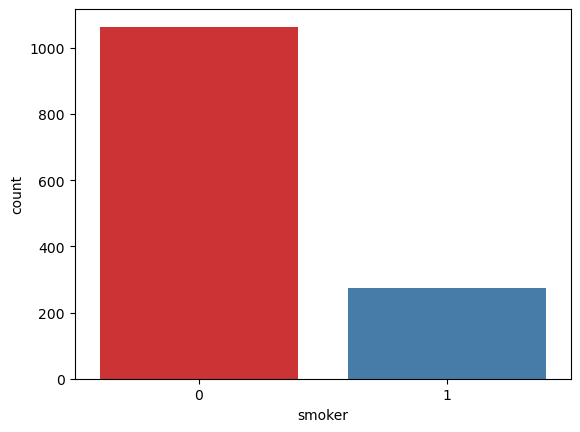

In [54]:
sns.countplot(x="smoker", data=df, palette="Set1")      

<AxesSubplot:xlabel='region', ylabel='count'>

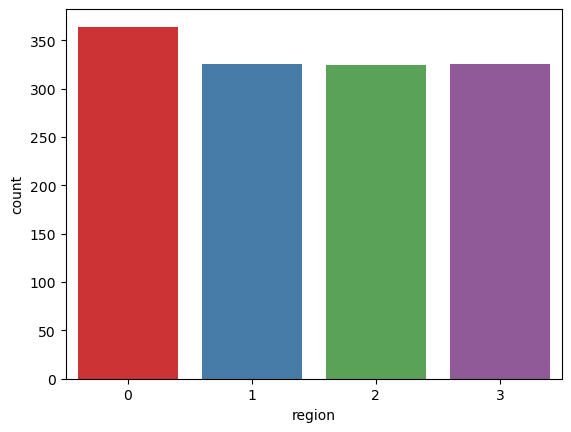

In [55]:
sns.countplot(x="region", data=df, palette="Set1")      

<AxesSubplot:xlabel='children', ylabel='count'>

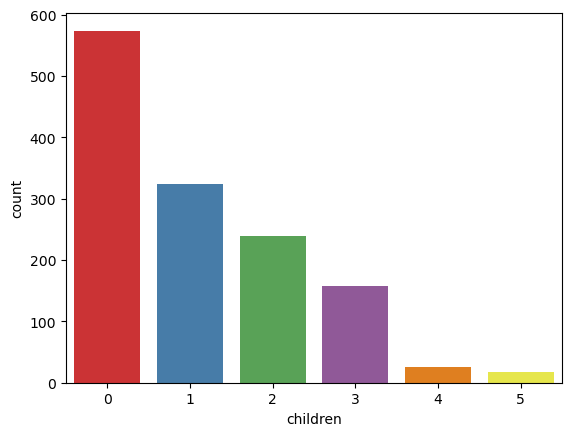

In [56]:
sns.countplot(x="children", data=df, palette="Set1")        

<AxesSubplot:xlabel='age', ylabel='count'>

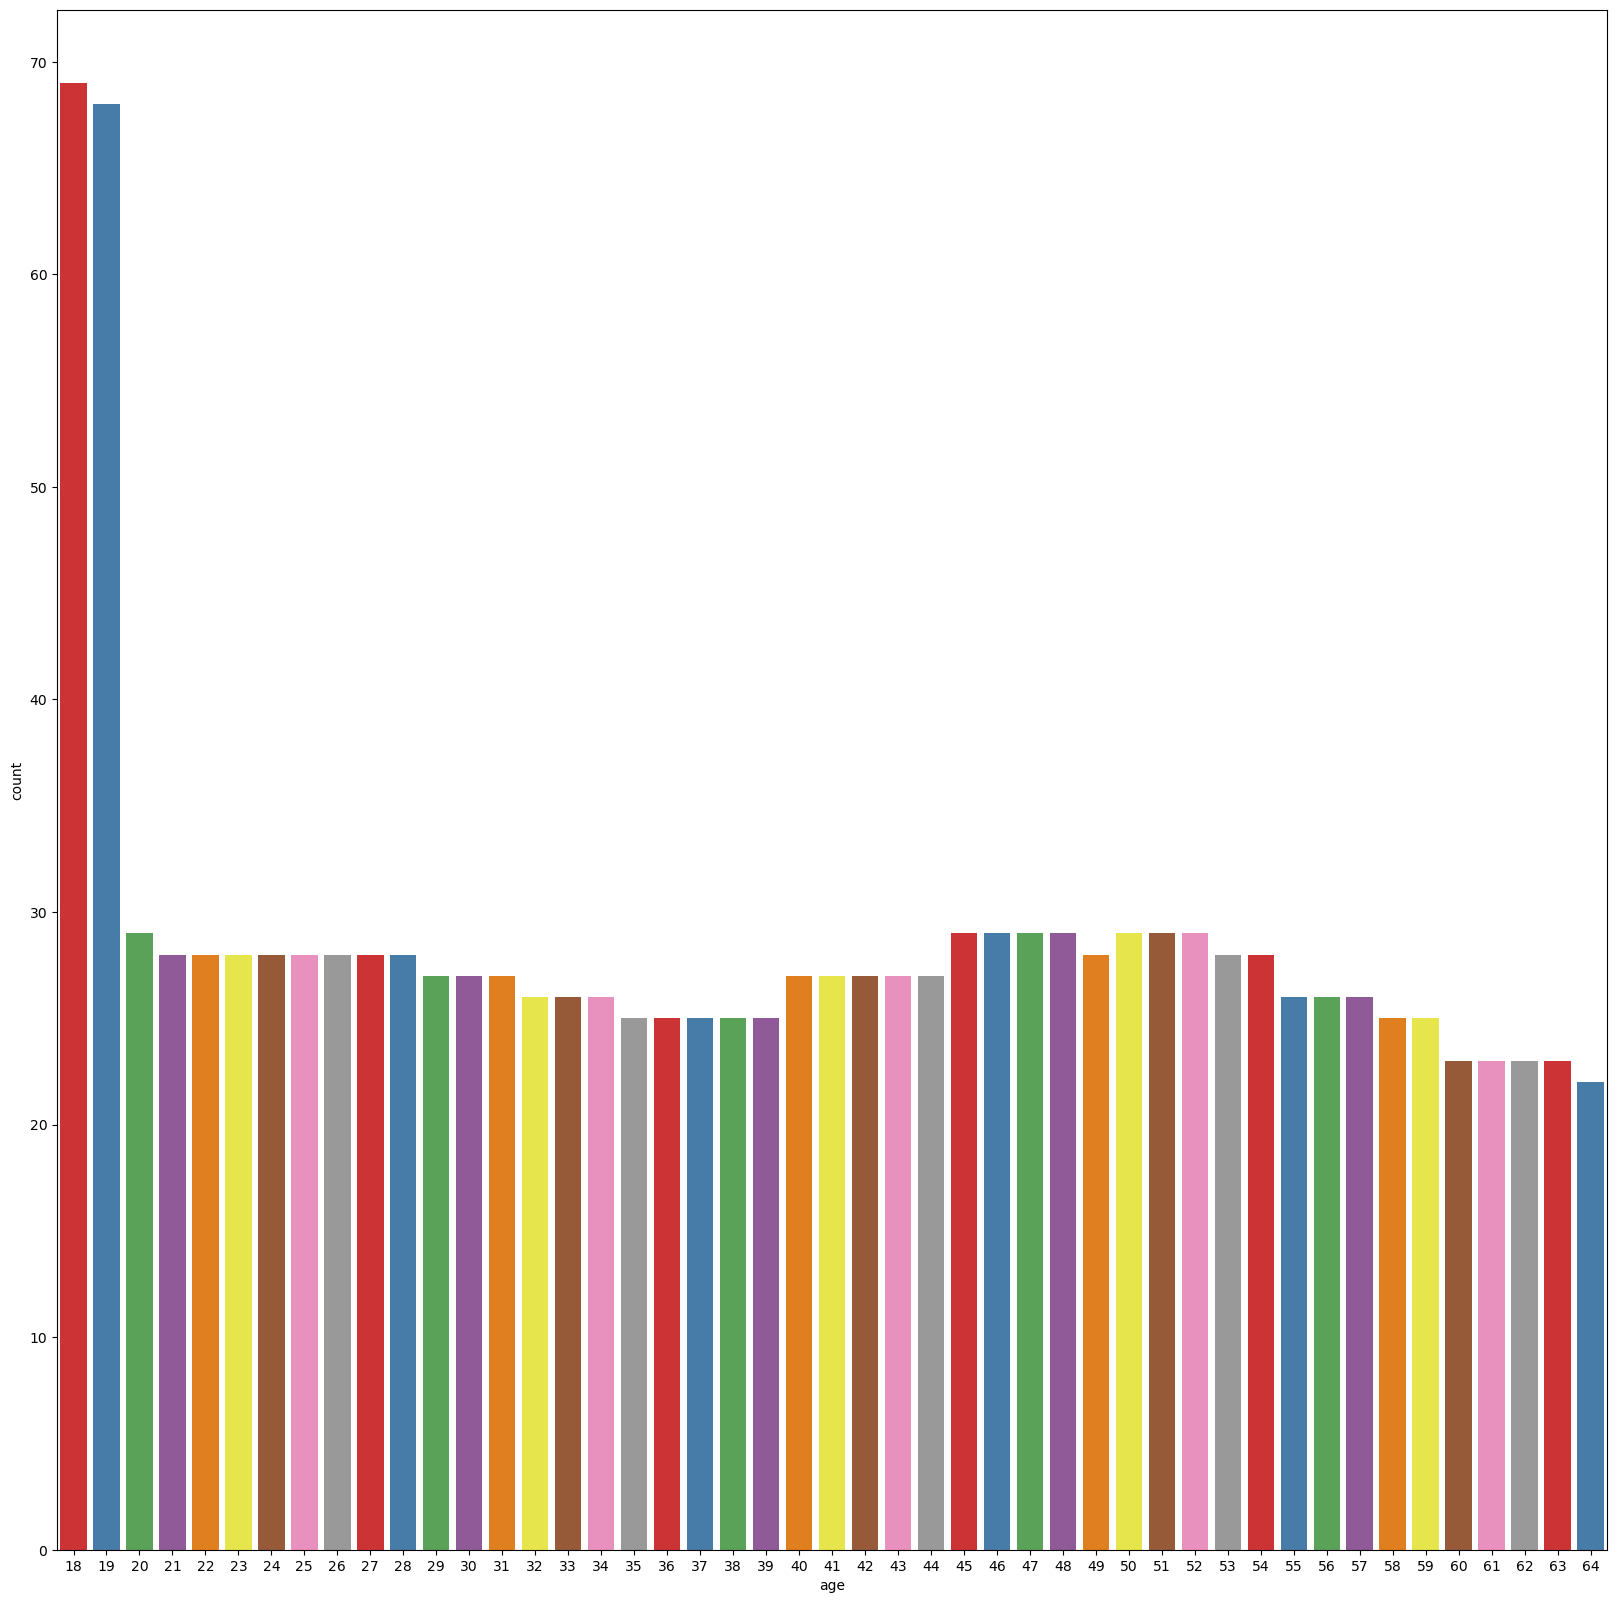

In [59]:
plt.figure(figsize=(20,20))
sns.countplot(x="age", data=df, palette="Set1")       

<AxesSubplot:xlabel='age', ylabel='Count'>

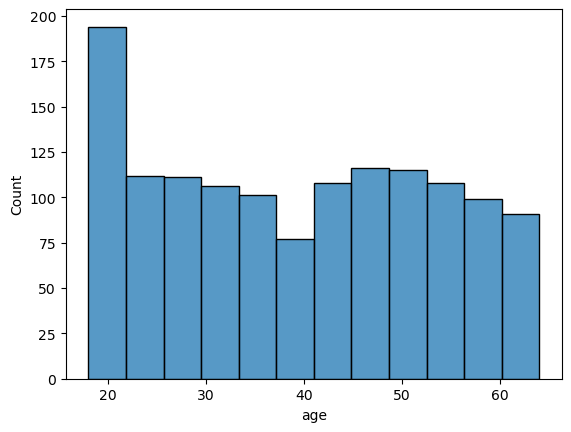

In [60]:
sns.histplot(x= "age", data = df)

<AxesSubplot:xlabel='age', ylabel='Density'>

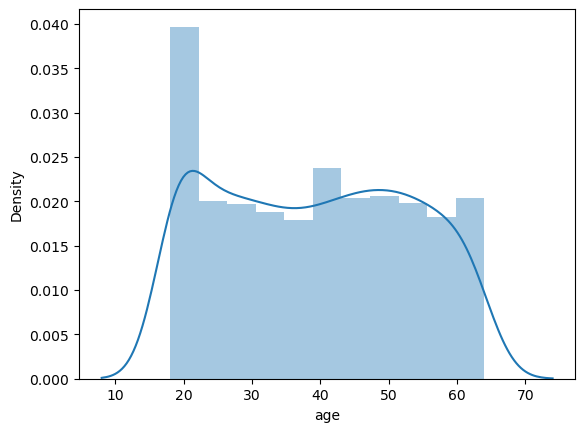

In [61]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

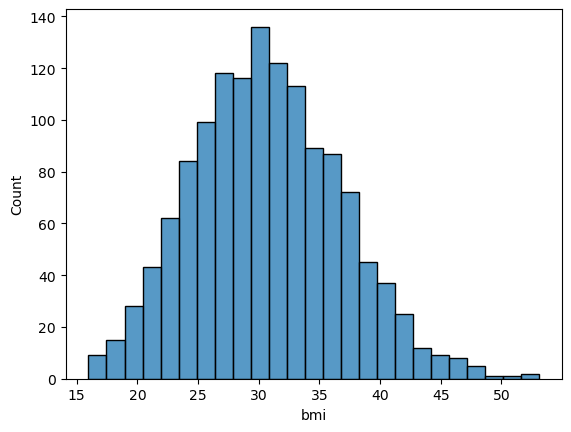

In [62]:
sns.histplot(x= "bmi", data = df)

<AxesSubplot:>

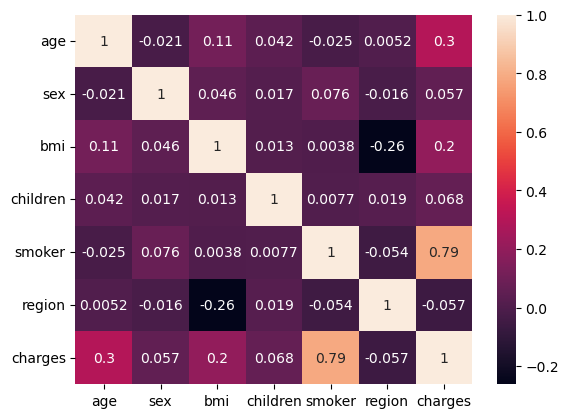

In [63]:
#HEATMAP
sns.heatmap(df.corr(), annot=True)

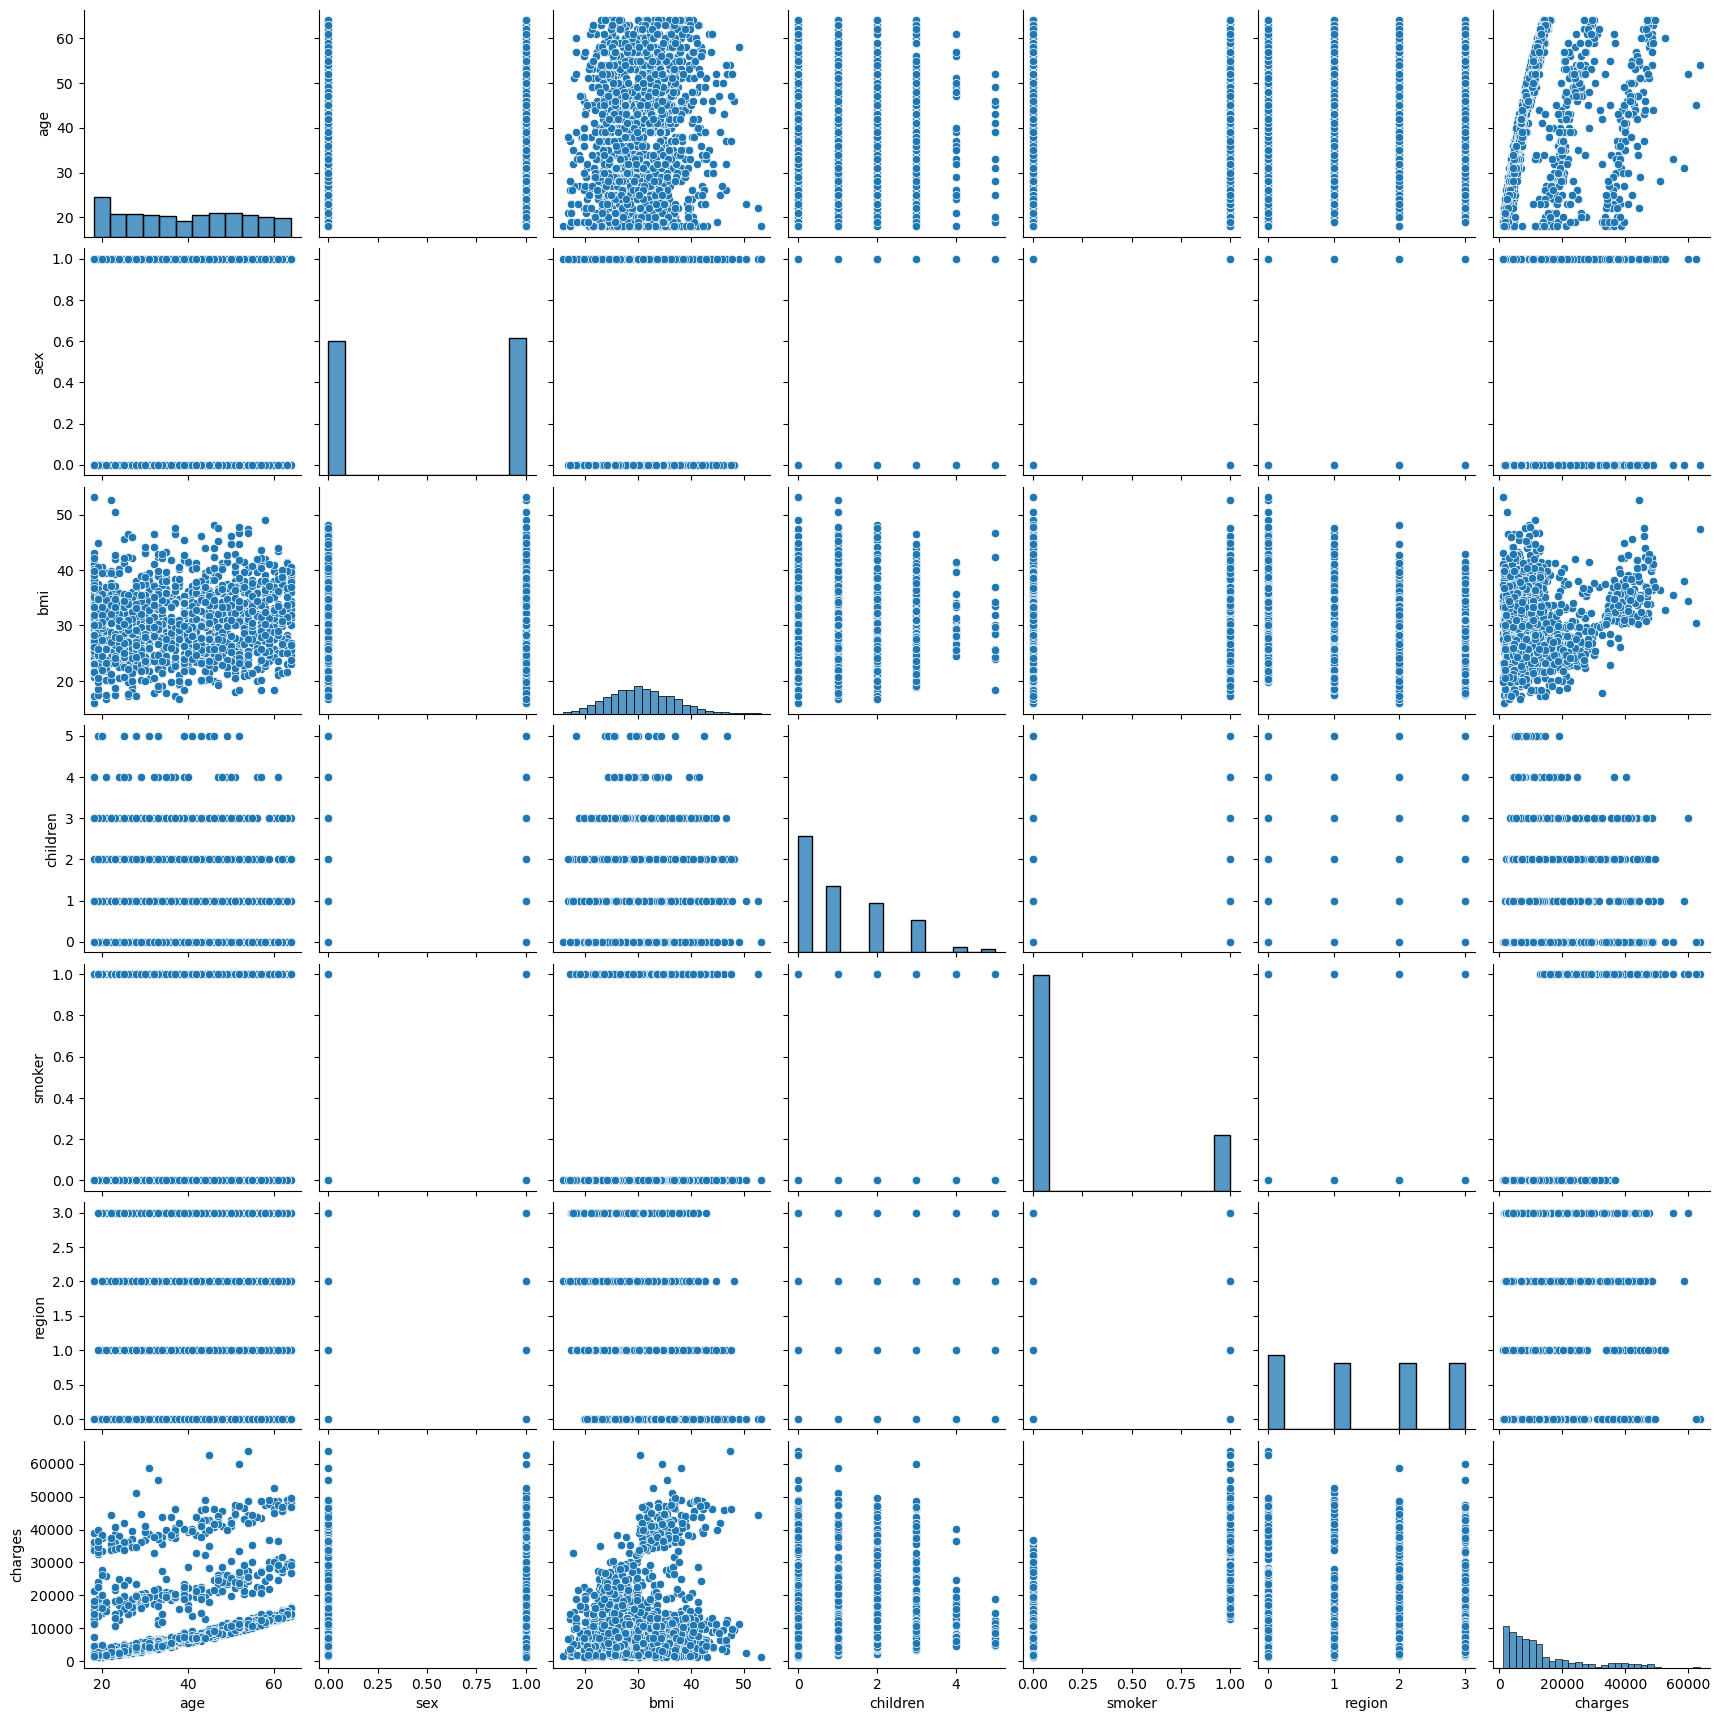

In [12]:
sns.pairplot(df)

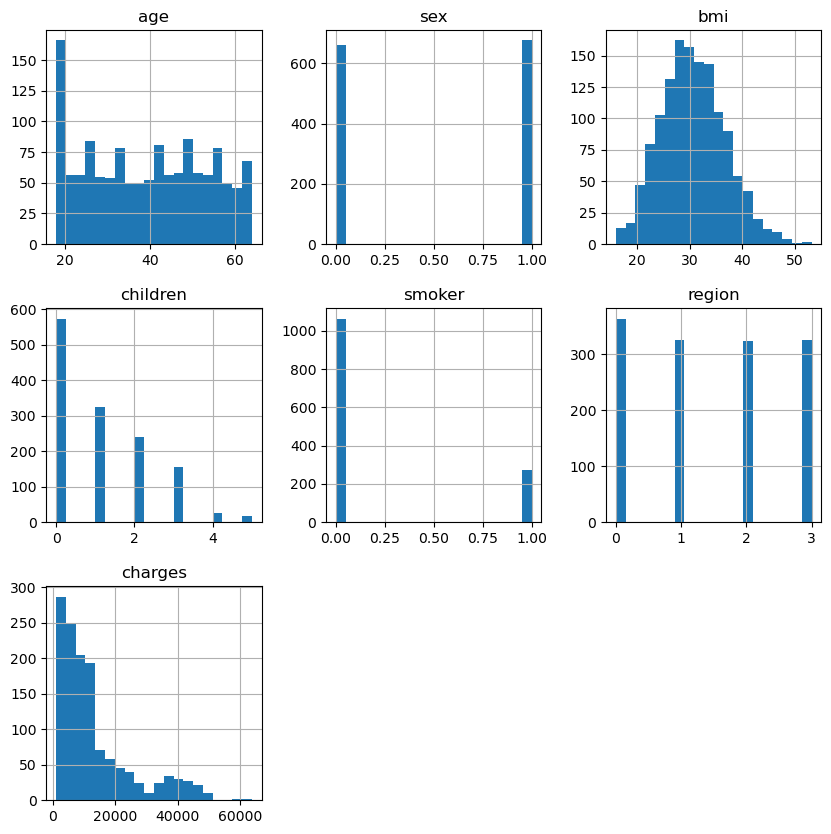

In [64]:
df.hist(bins=20, figsize=(10,10))                                              #or#   df.hist
plt.show() 

<AxesSubplot:xlabel='age', ylabel='bmi'>

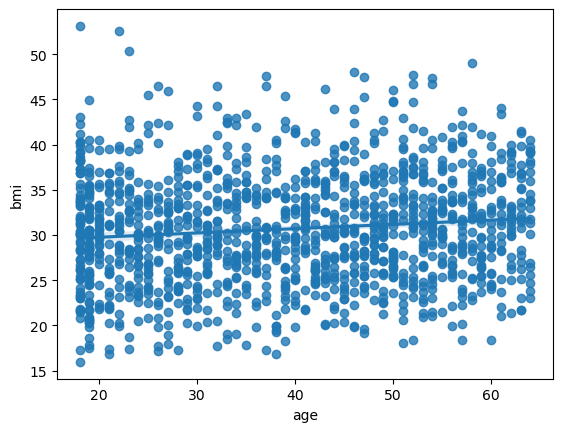

In [66]:
sns.regplot(df["age"],df["bmi"],data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

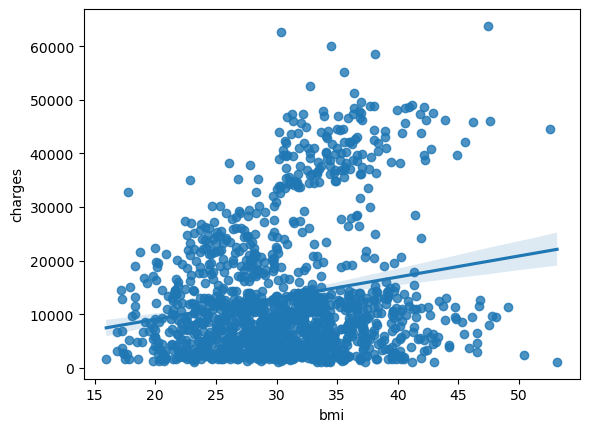

In [65]:
sns.regplot(df["bmi"],df["charges"],data=df)       #or# sns.regplot(x="CRIM",y="Price",data=df)      

Text(0, 0.5, 'CHARGES')

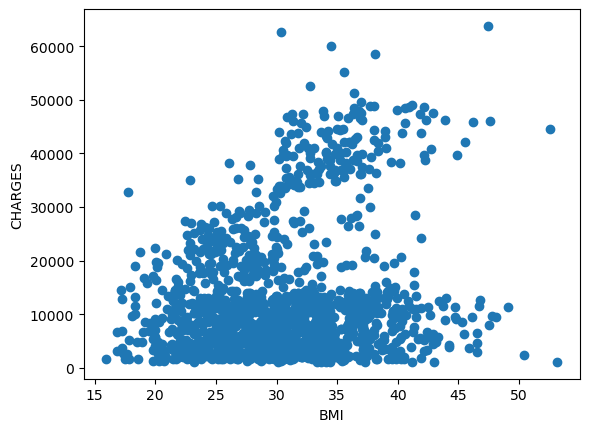

In [67]:
plt.scatter(df['bmi'],df['charges'])            
plt.xlabel("BMI")
plt.ylabel("CHARGES") 

In [68]:
### Splitting the data and Target
Y = df['charges']
X = df.drop(columns='charges', axis=1)

In [69]:
### train_test_split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=2)

In [72]:
from sklearn.metrics import r2_score
### REGRESSION ALGORITHMS                       
from sklearn.linear_model import LinearRegression             #1
from sklearn.linear_model import Lasso                        #2
from sklearn.ensemble import RandomForestRegressor            #3        
from sklearn.tree import DecisionTreeRegressor                #4
from xgboost import XGBRegressor                              #5

In [73]:
#1. Linear Regression.1                                                  
m1 = LinearRegression()

m1.fit(xtrain, ytrain)                                #model training
m1TrPRED = m1.predict(xtrain)                         #model evaluation(with training data)      

score = r2_score(ytrain, m1TrPRED)                                         
print(score)

0.751505643411174


In [74]:
m1TePRED = m1.predict(xtest)                          #model evaluation(with test data) 

score = r2_score(ytest, m1TePRED)                                          
print(score)

0.7447273869684078


In [75]:
#2. Lasso.2                                                 
m2 = Lasso()

m2.fit(xtrain, ytrain)
m2TrPRED = m2.predict(xtrain)                             

score = r2_score(ytrain, m2TrPRED)                                      
print(score)

0.7515055550686265


In [76]:
m2TePRED = m2.predict(xtest)                                 

score = r2_score(ytest, m2TePRED)                                          
print(score)

0.7447245444913575


In [77]:
#3. RandomForestRegressor.3                                              
m3 = RandomForestRegressor()

m3.fit(xtrain, ytrain)
m3TrPRED = m3.predict(xtrain)                            

score = r2_score(ytrain, m3TrPRED)                                             
print(score)

0.97784979605128


In [78]:
m3TePRED = m3.predict(xtest)                                  

score = r2_score(ytest, m3TePRED)                                            
print(score)

0.8376674666977073


In [79]:
#4. DecisionTreeRegressor.4                                              
m4 = DecisionTreeRegressor()

m4.fit(xtrain, ytrain)
m4TrPRED = m4.predict(xtrain)                                

score = r2_score(ytrain, m4TrPRED)                                           
print(score)

1.0


In [80]:
m4TePRED = m4.predict(xtest)                                   

score = r2_score(ytest, m4TePRED)                                            
print(score)

0.6952270101438349


In [81]:
#5. XGBRegressor.5                                                
m5 = XGBRegressor()

m5.fit(xtrain, ytrain)
m5TrPRED = m5.predict(xtrain)                                   

score = r2_score(ytrain, m5TrPRED)                                              
print(score)

0.9962665931681515


In [82]:
m5TePRED = m5.predict(xtest)                                    

score = r2_score(ytest, m5TePRED)                                          
print(score)

0.8217591365018906


In [83]:
####training data r2_score:-
#-----------------------------------------------------------------------------------------------------
#1.LinearRegression - 0.75   
#2.Lasso - 0.75                     
#3.RandomForestRegressor - 0.97                   
#4.DecisionTreeRegressor - 1.0              
#5.XGBRegressor - 0.99                            

In [84]:
####test data r2_score:-
#------------------------------------------------------------------------------------------------------
#1.LinearRegression - 0.74           
#2.Lasso - 0.74                       
#3.RandomForestRegressor - 0.84                   
#4.DecisionTreeRegressor - 0.69               
#5.XGBRegressor - 0.82

In [86]:
###Building a Predictive System
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = m1.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27662.06512745]
The insurance cost is USD  27662.065127448124


In [98]:
A= (32,1,28.880,0,0,3)
B= np.asarray(A)                                # changing input_data ---------> numpy array
C= B.reshape(1,-1)                               # reshape the array

prediction = m1.predict(C)
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  5660.265427371145
